<a href="https://colab.research.google.com/github/nyjinnn/images/blob/main/nyjinnn/AI_study/220620_Chapter4_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀 연습문제

## 아이리스 데이터셋

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 

1. 아이리스 데이터셋 준비

In [4]:
iris = load_iris()
print(iris.data.shape, iris.target.shape)
sepal_length = iris.data[:100, 0]  # sepal : 꽃받침
sepal_width = iris.data[:100, 1]
petal_length = iris.data[:100, 2]  # petal : 꽃잎
petal_width = iris.data[:100, 3]

(150, 4) (150,)


2. 아이리스 데이터 셋은 총 3개의 종류를 분류하는 문제이기 때문에 그 중에서 2개의 종류만 택하기 위해서 슬라이싱을 해준다. 

In [5]:
x = iris.data[:100]
y = iris.target[:100]

print(np.shape(x), np.shape(y))

(100, 4) (100,)


3. 특성 중에서 꽃받침과 꽃잎에 대해서 샘플들의 분포를 살펴본다. 

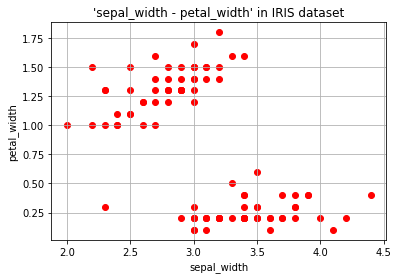

In [6]:
plt.scatter(sepal_width, petal_width, marker="o", color='r')
plt.grid()
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.title("'sepal_width - petal_width' in IRIS dataset")
plt.show()

4. 데이터셋을 train과 test로 나누고 값의 분포를 확인한다. 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [8]:
print(x_train.shape, y_train.shape)

(80, 4) (80,)


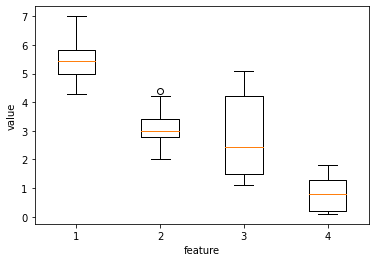

In [9]:
plt.boxplot(x_train)
plt.xlabel("feature")
plt.ylabel("value")
plt.show()

In [10]:
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([10, 10]))


In [57]:
class LogisticNeuron:
  def __init__(self):
    self.w = None 
    self.b = None 
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b 
    return z 

  def backprop(self, x, err, lr):
    w_grad = x * err * lr
    b_grad = 1 * err * lr
    return w_grad, b_grad 

  def fit(self, x, y, epochs=100, lr=0.01, show=10):
    self.w = np.ones(x.shape[1])
    self.b = 0 
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i**2 - a**2)
        w_grad, b_grad = self.backprop(x_i, err, lr)
        self.w -= w_grad 
        self.b -= b_grad 
      if (i+1) % show == 0 or i == 0:
        print("epoch {} : err = {:.9f}".format(i+1, err))
  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a 

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a

In [59]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train, 300000, 0.1, 10000)

epoch 1 : err = 0.061903918
epoch 10000 : err = 0.000019796
epoch 20000 : err = 0.000009050
epoch 30000 : err = 0.000005684
epoch 40000 : err = 0.000004075
epoch 50000 : err = 0.000003143
epoch 60000 : err = 0.000002539
epoch 70000 : err = 0.000002119
epoch 80000 : err = 0.000001811
epoch 90000 : err = 0.000001576
epoch 100000 : err = 0.000001392
epoch 110000 : err = 0.000001243
epoch 120000 : err = 0.000001121
epoch 130000 : err = 0.000001020
epoch 140000 : err = 0.000000934
epoch 150000 : err = 0.000000860
epoch 160000 : err = 0.000000796
epoch 170000 : err = 0.000000741
epoch 180000 : err = 0.000000692
epoch 190000 : err = 0.000000649
epoch 200000 : err = 0.000000610
epoch 210000 : err = 0.000000575
epoch 220000 : err = 0.000000544
epoch 230000 : err = 0.000000516
epoch 240000 : err = 0.000000490
epoch 250000 : err = 0.000000467
epoch 260000 : err = 0.000000446
epoch 270000 : err = 0.000000426
epoch 280000 : err = 0.000000408
epoch 290000 : err = 0.000000391
epoch 300000 : err = 0.0

In [63]:
output = neuron.predict(x_test)
print(100*(1 - np.mean(output - y_test)))
print(np.mean((output > 0.5) == y_test))


99.99808353059343
1.0


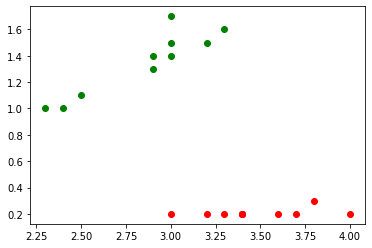

In [ ]:
for i in x_test:
  if neuron.predict([i]) == 0:
    plt.scatter(i[1], i[3], c='r')
  elif neuron.predict([i]) == 1:
    plt.scatter(i[1], i[3], c='g')
plt.show()